In [1]:
import librosa
import numpy as np
import glicol as gym

In [ ]:
# !wget https://raw.githubusercontent.com/chaosprint/Dirt-Samples/master/808bd/BD0000.WAV

In [2]:
import IPython.display as ipd
ipd.Audio("BD0050.WAV")

In [3]:
target, sr = librosa.load("BD0050.WAV", sr=None)
dur = len(target) / sr
print(target, dur)

[-4.5776367e-04 -8.2397461e-04 -5.1879883e-04 ... -6.1035156e-05
  0.0000000e+00  0.0000000e+00] 1.5000226757369615


In [4]:
env = gym.make(
    # """
    # o: constsig 42
    # """,
    """
     ~env: imp 0.1 >> envperc {} {}
    
    kick_drum: sin {} >> mul ~env
    """,
    total_step=1,
    step_len=dur,
    target = target,
    action_space=[["lin", 0.0001, dur-0.0001], ["by", 0, lambda x: dur-0.0001-x], ["lin", 10, 200]]
)

In [5]:
observation = env.reset()

In [6]:
action = env.action_space.sample()
print(action)

[1.0176005603581506, 0.48232211537881087, 185.71745388402107]


step <bound method Env.step of <glicol.Env object at 0x0000024152033400>> in total 1
-0.17549297763965957 False 0


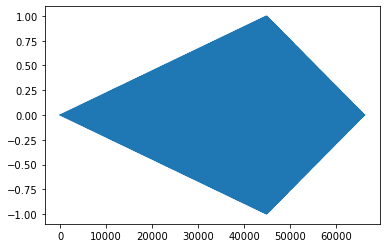

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
# librosa.display.waveplot(observation, sr=sr)

observation, reward, done, info = env.step(action)
plt.plot(observation)
print(reward, done, info)

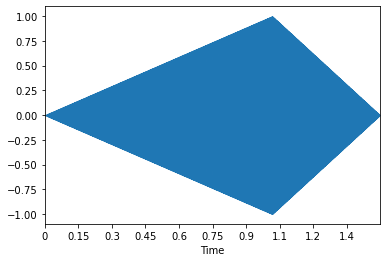

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
librosa.display.waveplot(observation, sr=sr)

In [9]:
ipd.Audio(observation, rate=sr)

◼︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎◼︎ 100.00%


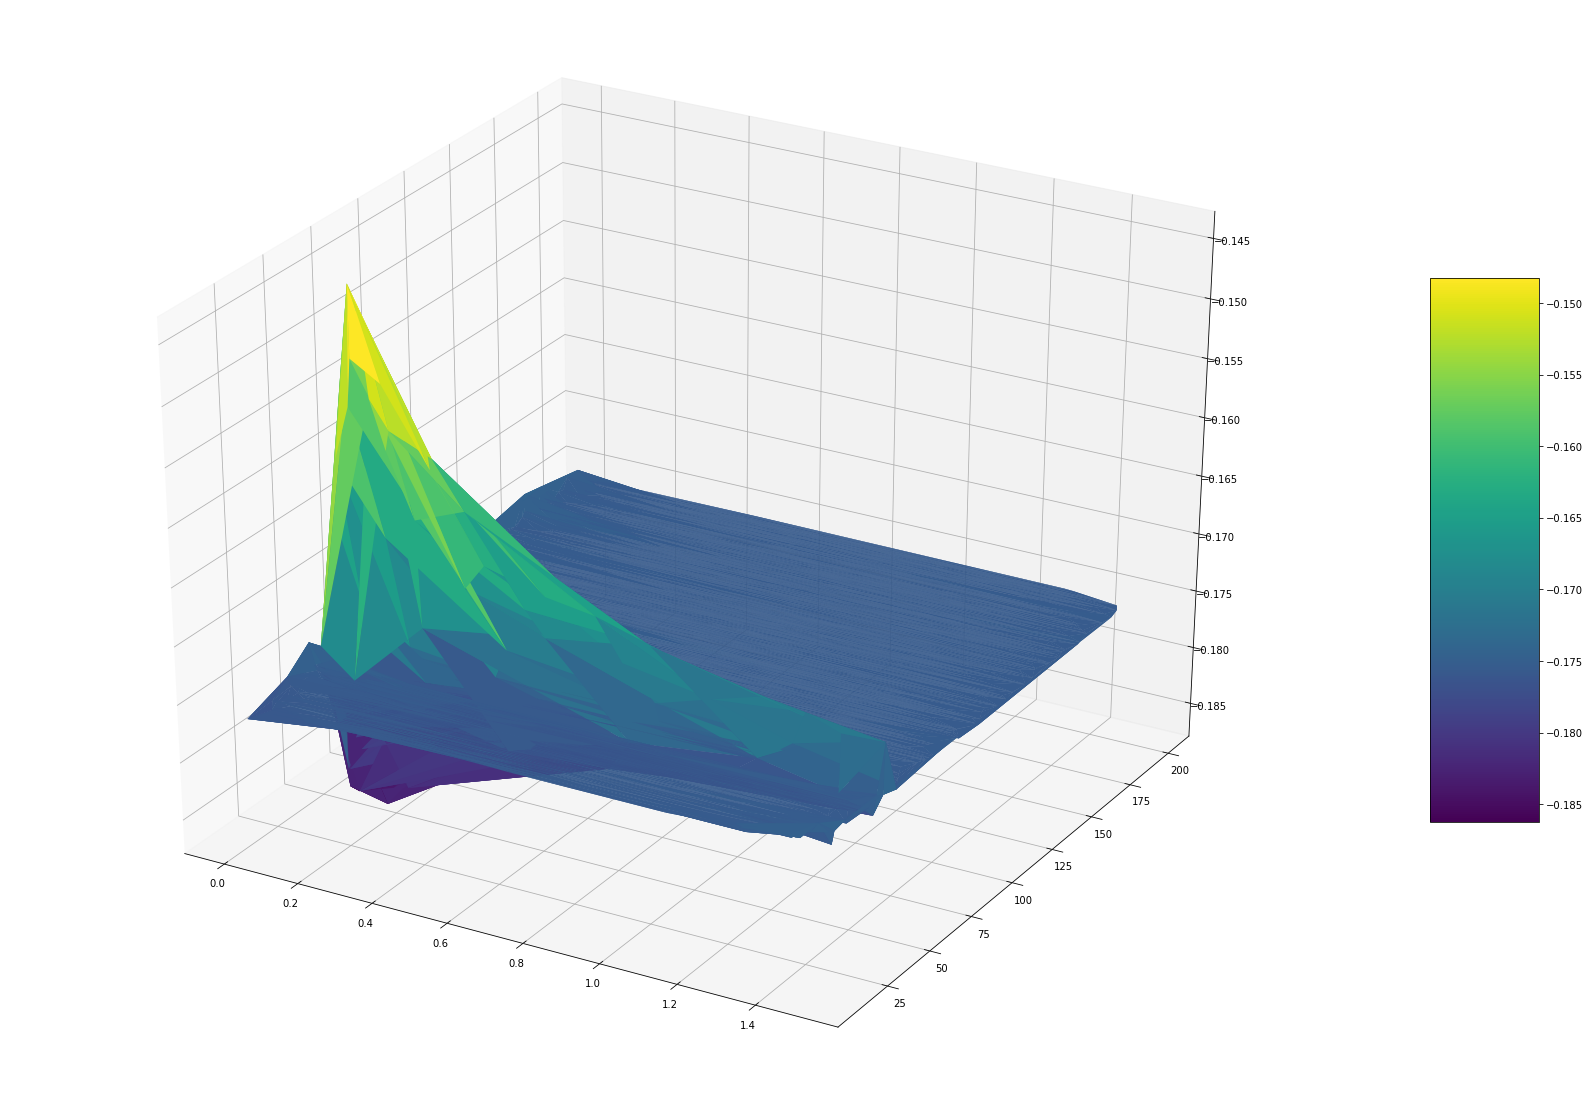

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import clear_output

freqs = []
attacks = []
rewards = []
epoches = 3000

for i in range(epoches):
    observation = env.reset()
    action = env.action_space.sample()
#     print(action[])
    freqs.append(action[2])
    attacks.append(action[0])
    observation, reward, done, info = env.step(action)
    rewards.append(reward)
    clear_output(wait=True)
    prog = (i+1)/epoches*100
    bar = "◼︎" * int(prog/5) + "◻︎" *(20 - int(prog/5));
    print(bar+" {0:.2f}%".format(prog))

fig = plt.figure(figsize=(30, 20))
ax = fig.gca(projection='3d')
ax.plot_trisurf(attacks, freqs, rewards, cmap=plt.cm.viridis, linewidth=0.2)
# plt.show()
 
# to Add a color bar which maps values to colors.
surf=ax.plot_trisurf(attacks, freqs, rewards, cmap=plt.cm.viridis, linewidth=0.2)
fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()

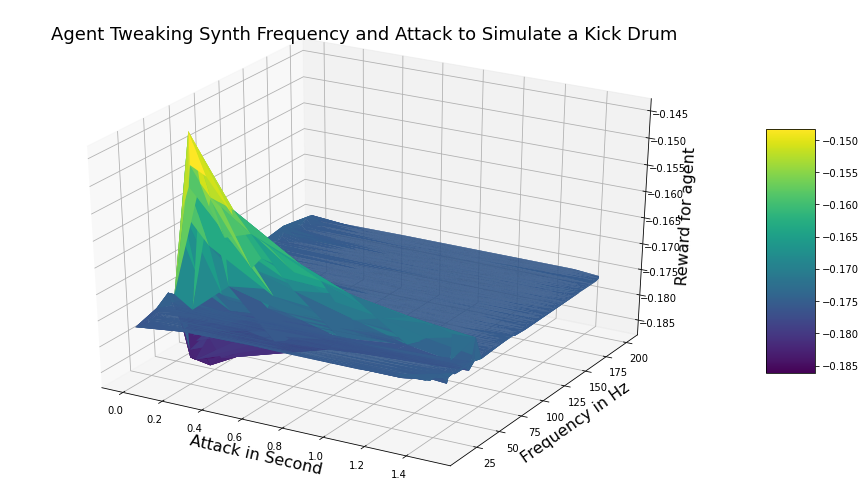

In [11]:
# z = np.zeros((len(attacks), len(freqs)))

# for i, x in enumerate(rewards):
#     z[i][i] = x

fig = plt.figure(figsize=(16, 9))
ax = fig.gca(projection='3d')
ax.plot_trisurf(attacks, freqs, rewards, cmap=plt.cm.viridis, linewidth=0.2)
# plt.show()
 
 
# to Add a color bar which maps values to colors.
surf=ax.plot_trisurf(attacks, freqs, rewards, cmap=plt.cm.viridis, linewidth=0.2)
ax.set_title('Agent Tweaking Synth Frequency and Attack to Simulate a Kick Drum', fontsize=18)
ax.set_xlabel('Attack in Second', fontsize=16)
# ax.set_xlim(-40, 40)
ax.set_ylabel('Frequency in Hz', fontsize=16)
# ax.set_ylim(-40, 40)
ax.set_zlabel('Reward for agent', fontsize=16)
# ax.set_zlim(-5, 0)
fig.colorbar( surf, shrink=0.5, aspect=5)
plt.savefig("drum.pdf")
plt.show()

The result makes sense.